# Moving Beyond Linear Models

### Polynomial Regression
Add additional predictors that are the original predictors raised to a power, ie X, X^2, X^3

### Step Functions
Cut the range of a variable into K distinct regions to produce a qualitative variable.  Fits like a piecewise constant function.

### Regression Splines
Similar to Step Function & Poly Regression, divide range of X into distinct regions and fit each region using a polynomial function.  But, they are constrained so they join smoothly to each region boundary (aka knot)

### Smoothing Splines
Similar to regression splines, but result from minimizing RSS with a smoothness penalty.

### Local Regression
Similar to splines, but regions can overlap, in a smooth way

### Generalized Additive Model
Extend above methods to work with multiple predictors





### 6.


In [5]:
require(ISLR)
require(boot)
attach(Wage)

The following objects are masked from Wage (pos = 3):

    age, education, health, health_ins, jobclass, logwage, maritl,
    race, region, wage, year

The following objects are masked from Wage (pos = 4):

    age, education, health, health_ins, jobclass, logwage, maritl,
    race, region, wage, year



[1] 1675.837 1601.012 1598.801 1594.217 1594.625 1594.888 1595.500 1595.436
 [9] 1596.335 1595.835

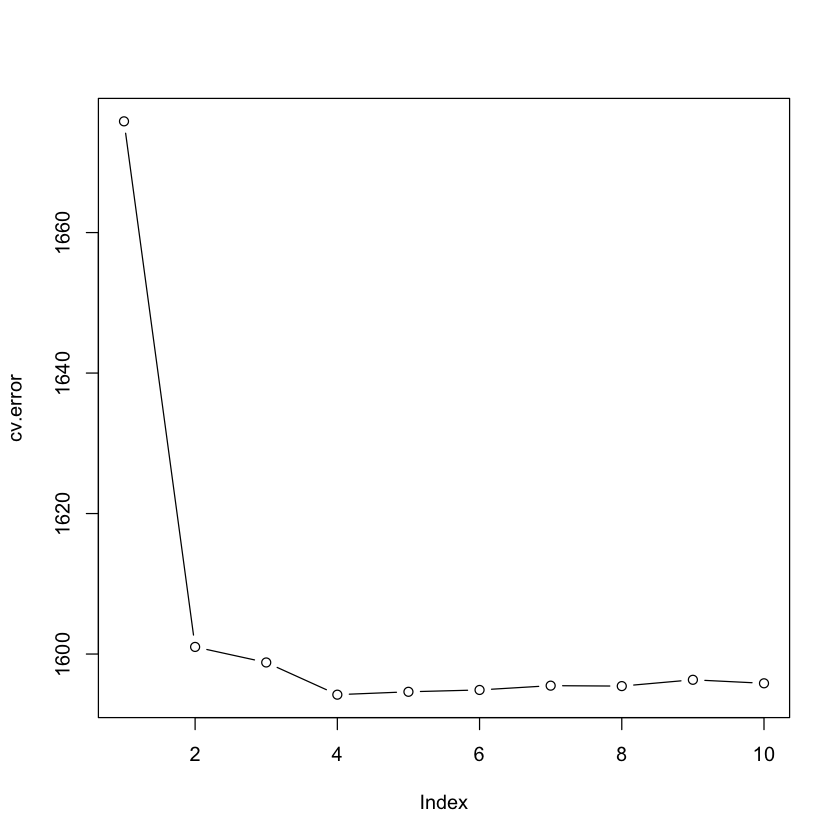

In [45]:
set.seed(1)
cv.error <- rep(0,10)
for (i in 1:10) {
    glm.fit <- glm(wage~poly(age,i), data=Wage)
    cv.error[i] <- cv.glm(Wage, glm.fit, K=10)$delta[1]  # [1]:std, [2]:bias-corrected
}
cv.error

plot(cv.error, type="b")

In [48]:
#attach(Wage)
set.seed(1)
    
cv.fit1 <- lm(wage~poly(age,1), data=Wage)
cv.fit2 <- lm(wage~poly(age,2), data=Wage)
cv.fit3 <- lm(wage~poly(age,3), data=Wage)
cv.fit4 <- lm(wage~poly(age,4), data=Wage)
cv.fit5 <- lm(wage~poly(age,5), data=Wage)
cv.fit6 <- lm(wage~poly(age,6), data=Wage)
cv.fit7 <- lm(wage~poly(age,7), data=Wage)
cv.fit8 <- lm(wage~poly(age,8), data=Wage)
cv.fit9 <- lm(wage~poly(age,9), data=Wage)
cv.fit10 <- lm(wage~poly(age,10), data=Wage)

anova(cv.fit1,cv.fit2,cv.fit3,cv.fit4,cv.fit5,cv.fit6,cv.fit7,cv.fit8,cv.fit9,cv.fit10)


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
2998,5022216,NA,NA,NA,NA
2997,4793430,1,2.287860e+05,1.437638e+02,2.187330e-32
2996,4777674,1,1.575569e+04,9.900512e+00,1.668583e-03
2995,4771604,1,6.070152e+03,3.814342e+00,5.090874e-02
2994,4770322,1,1.282563e+03,8.059328e-01,3.693978e-01
2993,4766389,1,3.932258e+03,2.470939e+00,1.160744e-01
2992,4763834,1,2.555281e+03,1.605679e+00,2.051989e-01
2991,4763707,1,1.266690e+02,7.959584e-02,7.778654e-01
2990,4756703,1,7.004317e+03,4.401350e+00,3.599425e-02
2989,4756701,1,2.637537e+00,1.657367e-03,9.675292e-01


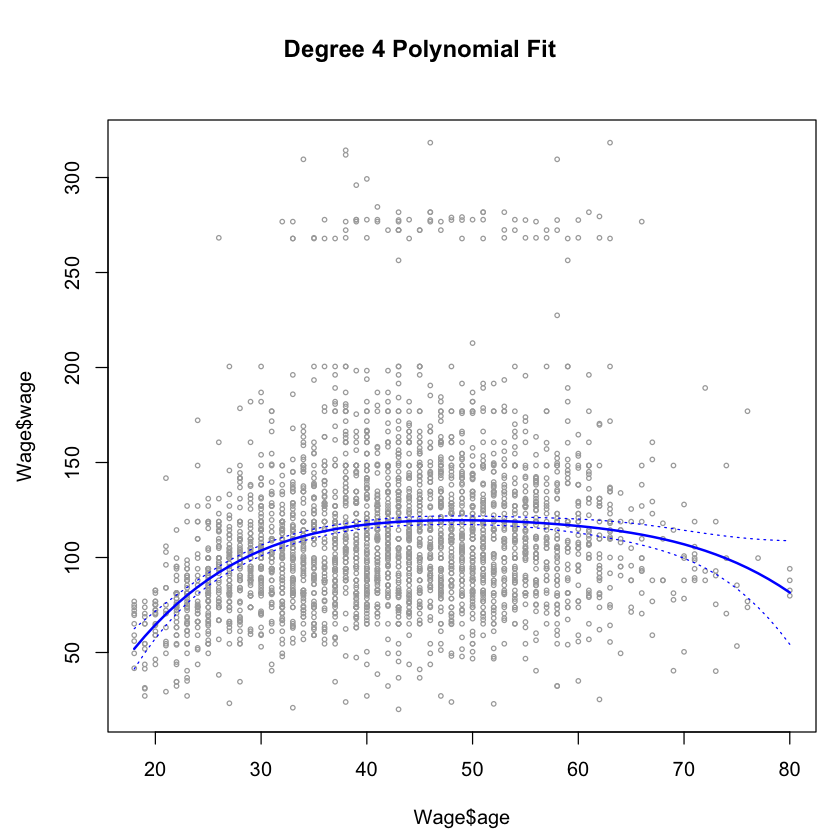

In [53]:
agelims <- range(Wage$age)
age.grid <- seq(agelims[1], agelims[2])
preds <- predict(cv.fit4, newdata=list(age=age.grid), se=TRUE)
se.bands <- preds$fit + cbind(2*preds$se.fit, -2*preds$se.fit)
par(mfrow=c(1,1), mar=c(4.5,4.5,1,1), oma=c(0,0,4,0))
plot(Wage$age, Wage$wage, xlim=agelims, cex=0.5, col="darkgrey")
title("Degree 4 Polynomial Fit", outer=TRUE)
lines(age.grid, preds$fit, lwd=2, col="blue")
matlines(age.grid, se.bands, lwd=1, col="blue", lty=3)

[1] 1733.889 1685.223 1634.303 1632.662 1623.739 1610.343 1599.366 1610.413
 [9] 1603.888 1600.033

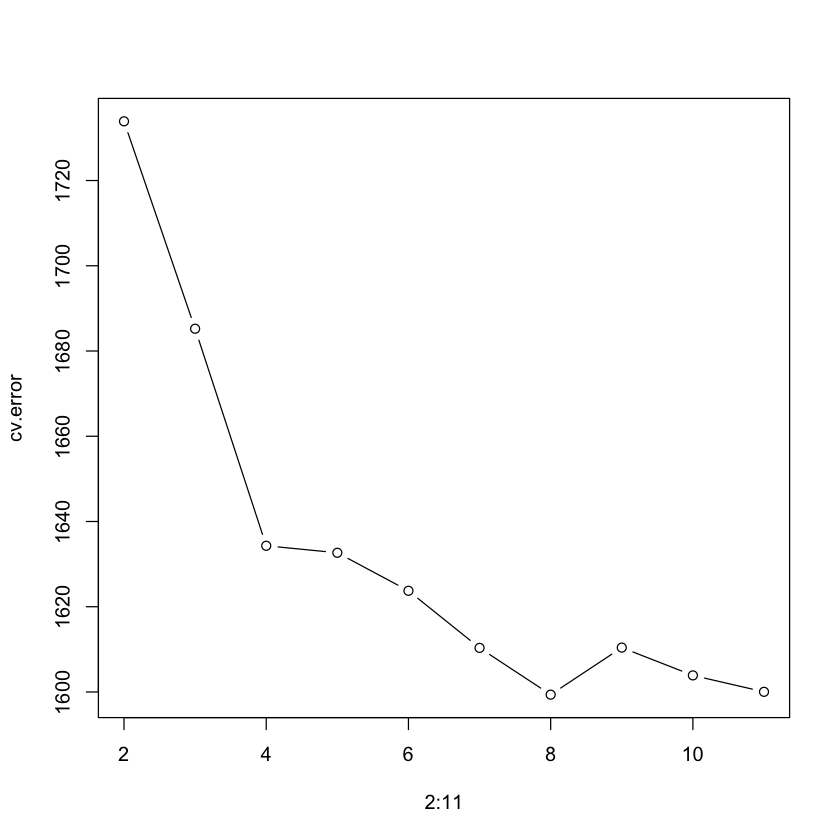

In [58]:
library(splines)
cv.error = rep(1:10)
for (i in 2:11) {
    Wage$age.cut <- cut(Wage$age, i)
    glm.fit <- glm(wage ~ age.cut, data=Wage)
    cv.error[i-1] <- cv.glm(Wage, glm.fit, K=10)$delta[1]
}
cv.error
plot(2:11, cv.error, type="b")  # 7 or 8 cuts look optimal

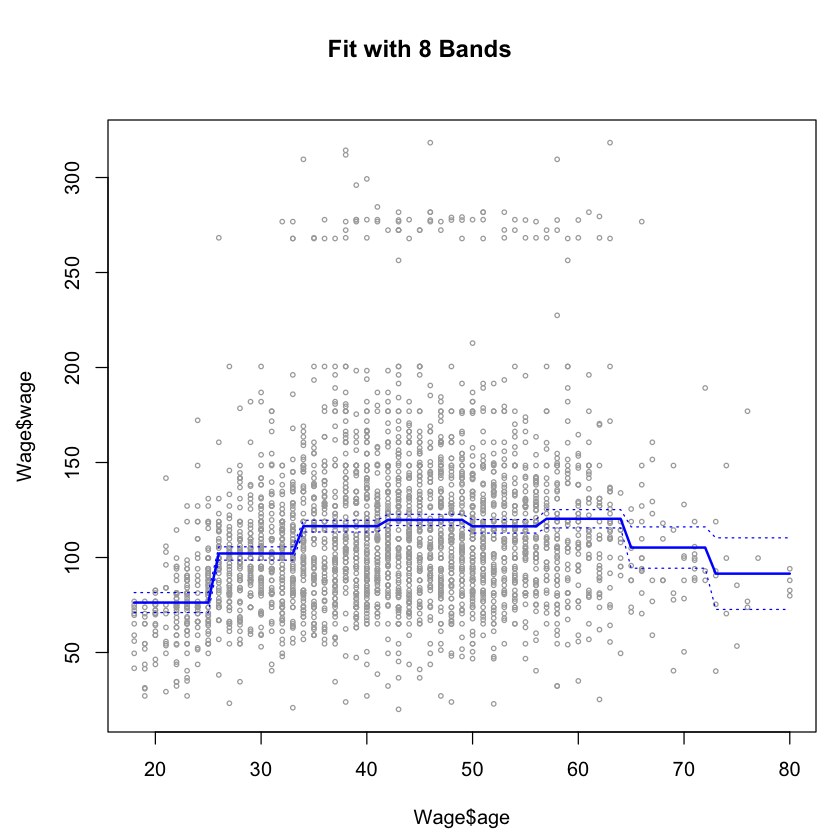

In [60]:
cut.fit <- glm(wage~cut(age,8), data=Wage)
agelims <- range(Wage$age)
age.grid <- seq(agelims[1], agelims[2])
preds <- predict(cut.fit, newdata=list(age=age.grid), se=TRUE)
se.bands <- preds$fit + cbind(2*preds$se.fit, -2*preds$se.fit)
par(mfrow=c(1,1), mar=c(4.5,4.5,1,1), oma=c(0,0,4,0))
plot(Wage$age, Wage$wage, xlim=agelims, cex=0.5, col="darkgrey")
title("Fit with 8 Bands", outer=TRUE)
lines(age.grid, preds$fit, lwd=2, col="blue")
matlines(age.grid, se.bands, lwd=1, col="blue", lty=3)

### 7.

Maybe use a GAM because maritial status and job class are qualitative?

Resid. Df,Resid. Dev,Df,Deviance,F,Pr(>F)
2995,4769777,NA,NA,NA,NA
2991,4647171,4.0000000000,122606.13,20.47315,1.168571e-16
2994,4602621,-3.0000000000,44549.34,NA,NA
2994,4654752,-0.0001661033,-52131.02,209628.57856,1.390753e-13
2990,4476501,4.0001661033,178251.80,29.76380,2.590093e-24
2998,4998547,-8.0001661033,-522046.83,43.58560,1.561384e-66


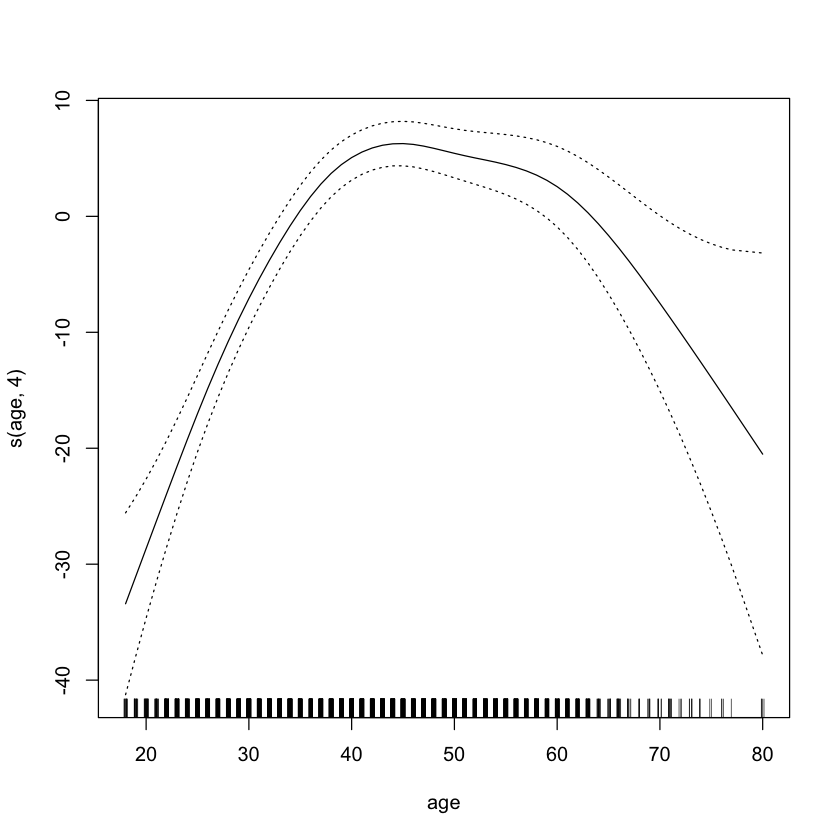

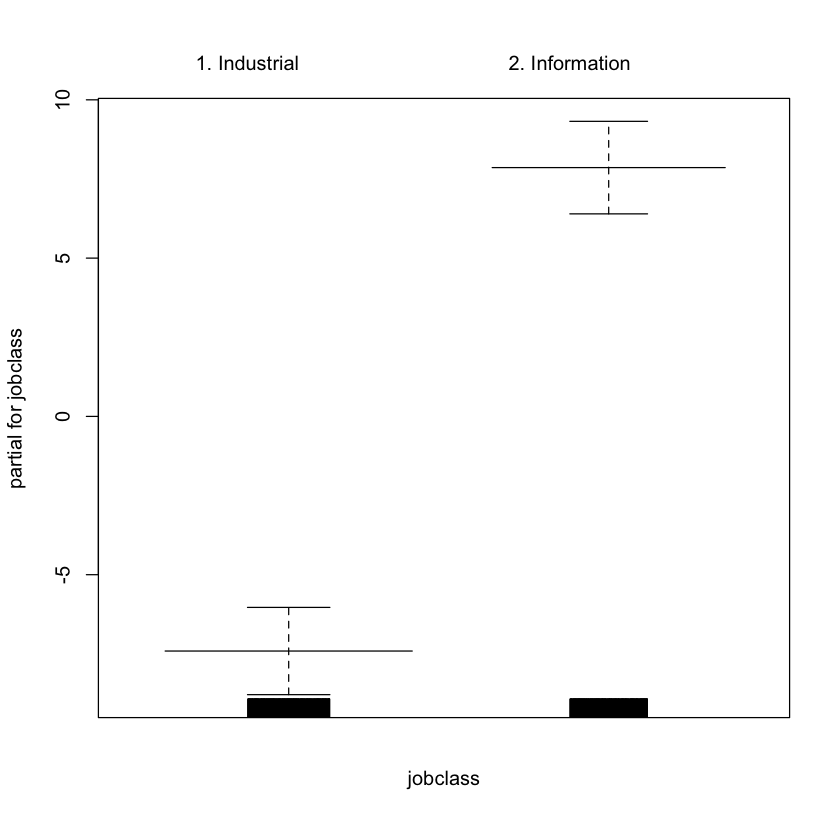

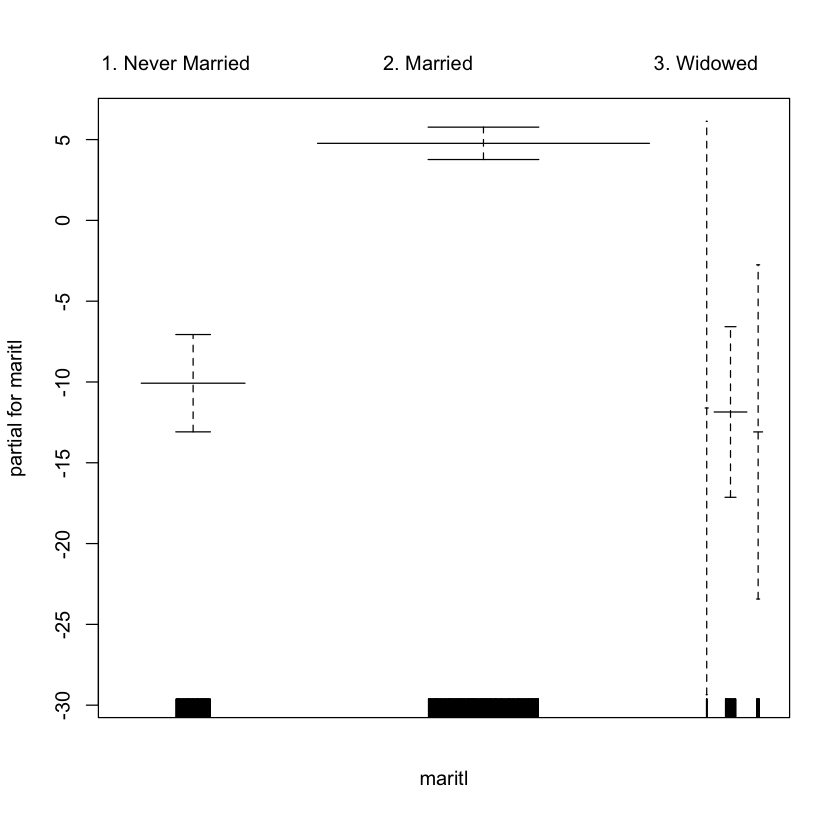

In [87]:
library(gam)
gam.age <- gam(wage~s(age,4), data=Wage)
gam.mar <- gam(wage~s(age,4)+maritl, data=Wage)
gam.job <- gam(wage~s(age,4)+jobclass, data=Wage)
gam.mj <- gam(wage~maritl+jobclass, data=Wage)
gam.all <- gam(wage~s(age,4)+jobclass+maritl, data=Wage)
gam.j <- gam(wage~jobclass, data=Wage)

anova(gam.age, gam.mar, gam.job, gam.mj, gam.all, gam.j, test="F")

# Looking at these options, jobclass best defines the difference in salary
plot(gam.all, se=TRUE)


### 8.

The following objects are masked from Auto (pos = 3):

    acceleration, cylinders, displacement, horsepower, mpg, name,
    origin, weight, year

The following objects are masked from Auto (pos = 4):

    acceleration, cylinders, displacement, horsepower, mpg, name,
    origin, weight, year

The following objects are masked from Auto (pos = 5):

    acceleration, cylinders, displacement, horsepower, mpg, name,
    origin, weight, year

The following objects are masked from Auto (pos = 6):

    acceleration, cylinders, displacement, horsepower, mpg, name,
    origin, weight, year

The following objects are masked from Auto (pos = 7):

    acceleration, cylinders, displacement, horsepower, mpg, name,
    origin, weight, year

The following objects are masked from Auto (pos = 8):

    acceleration, cylinders, displacement, horsepower, mpg, name,
    origin, weight, year

The following objects are masked from Auto (pos = 9):

    acceleration, cylinders, displacement, horsepower, mpg, nam

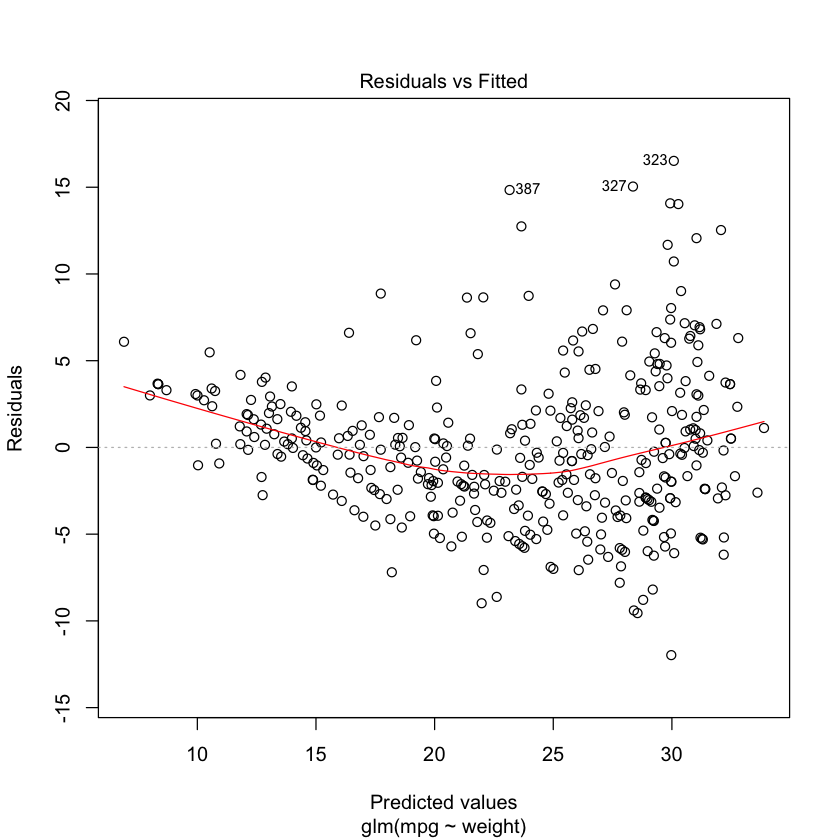

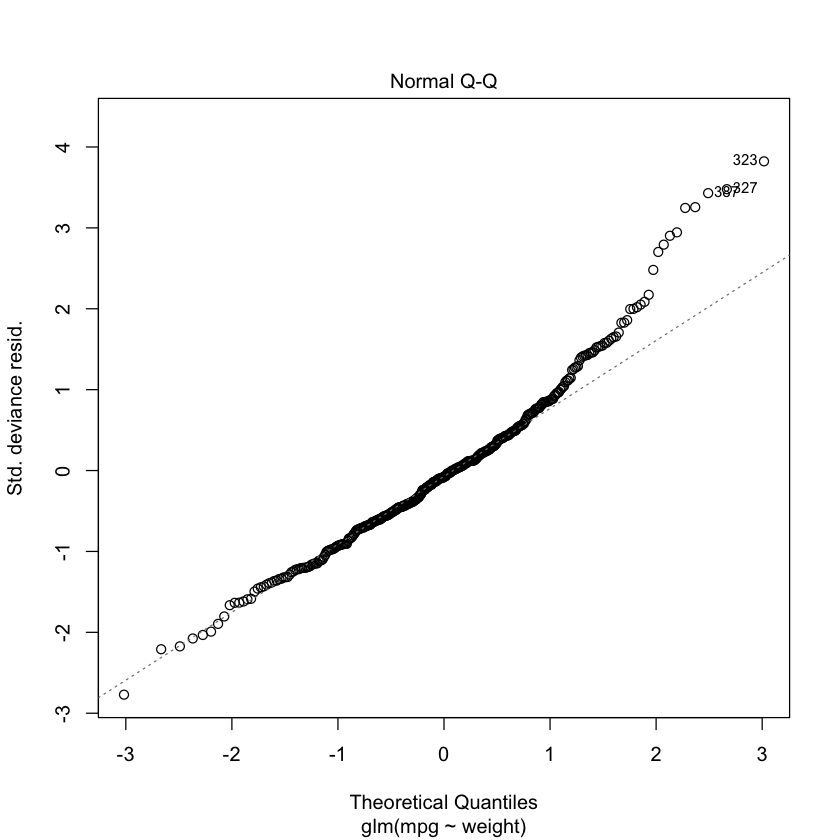

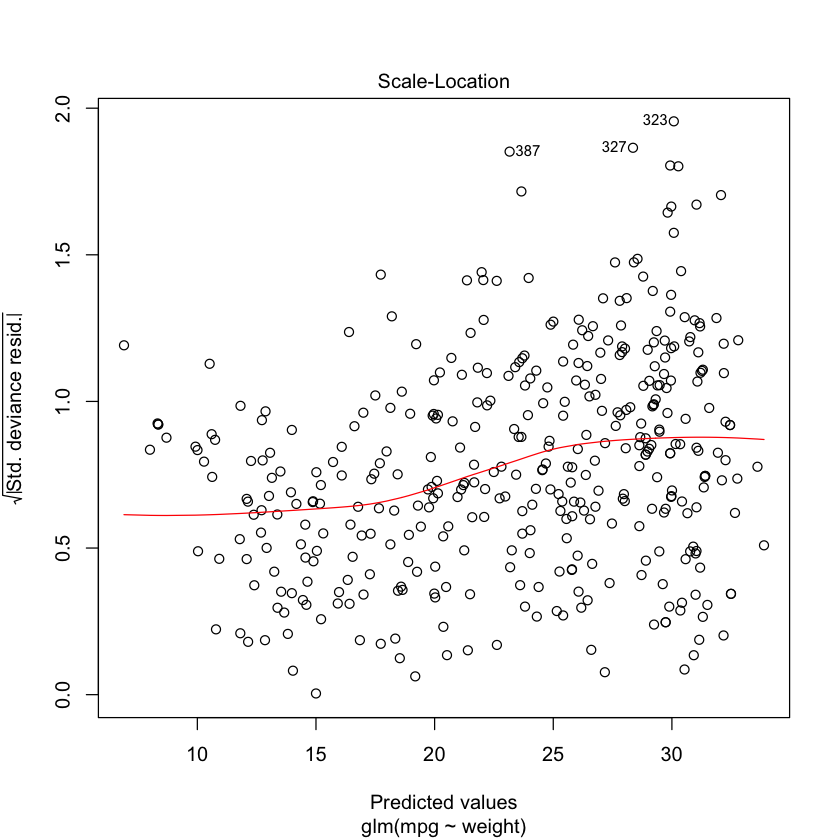

Resid. Df,Resid. Dev,Df,Deviance,F,Pr(>F)
390,11734.022,NA,NA,NA,NA
389,9426.007,1,2308.015,95.249,2.84902e-20
389,7241.744,0,2184.263,NA,NA


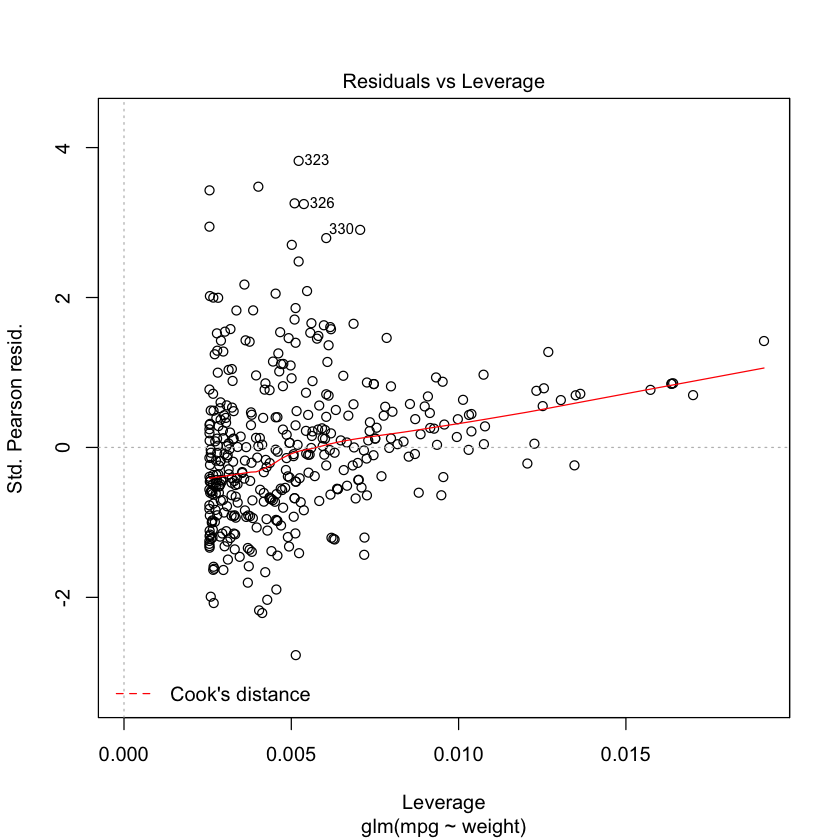

In [99]:
attach(Auto)

gam.hp = gam(mpg~I(horsepower^2), data=Auto)
gam.yr = gam(mpg~I(horsepower^2)+year, data=Auto)
gam.wt = gam(mpg~I(horsepower^2)+weight, data=Auto)
# plot(gam.wt)
glm.wt = glm(mpg~weight, data=Auto)
plot(glm.wt)


anova(gam.hp, gam.yr, gam.wt, test="F")